In [1]:
import matplotlib.pyplot as plt


# Perspective Projection

In [3]:
points = {
    'A': (1, 1, 1),
    'B': (-1, 1, 1),
    'C': (1, -1, 1),
    'D': (1, 1, -1),
    'E': (-1, -1, 1),
    'F': (1, -1, -1),
    'G': (-1, 1, -1),
    'H': (-1, -1, -1)
}

Camera = (2, 3, 5)

convert_points = {point: tuple(coord - cam for coord, cam in zip(coordinate, Camera)) for point, coordinate in points.items()}

def perspective_projection(x, y, z):
    u = x / z
    v = y / z
    return u, v

rendering_points = {point: perspective_projection(*coordinate) for point, coordinate in convert_points.items()}
rendering_points

{'A': (0.25, 0.5),
 'B': (0.75, 0.5),
 'C': (0.25, 1.0),
 'D': (0.16666666666666666, 0.3333333333333333),
 'E': (0.75, 1.0),
 'F': (0.16666666666666666, 0.6666666666666666),
 'G': (0.5, 0.3333333333333333),
 'H': (0.5, 0.6666666666666666)}

# Rasterization

In [23]:
edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'D'),  
    ('B', 'E'), ('B', 'G'),              
    ('C', 'E'), ('C', 'F'),              
    ('D', 'F'), ('D', 'G'),              
    ('E', 'H'),                          
    ('F', 'H'),                          
    ('G', 'H')                           
]

rasterization_points = list(rendering_points.values())


# You can adjust the granularity
granularity = 100
for edge in edges:
    p1, p2 = rendering_points[edge[0]], rendering_points[edge[1]]
    if p1[0] > p2[0]:
        p1, p2 = p2, p1
    direction_up = p1[1] < p2[1]
    step = ((p2[1] - p1[1])**2 + (p2[0] - p1[0])**2)**0.5 / granularity
    for idx in range(1, granularity):
        ratio = idx / granularity
        rasterization_points.append((p1[0] + ratio * (p2[0] - p1[0]), p1[1] + ratio * (p2[1] - p1[1])))
    

# Draw

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


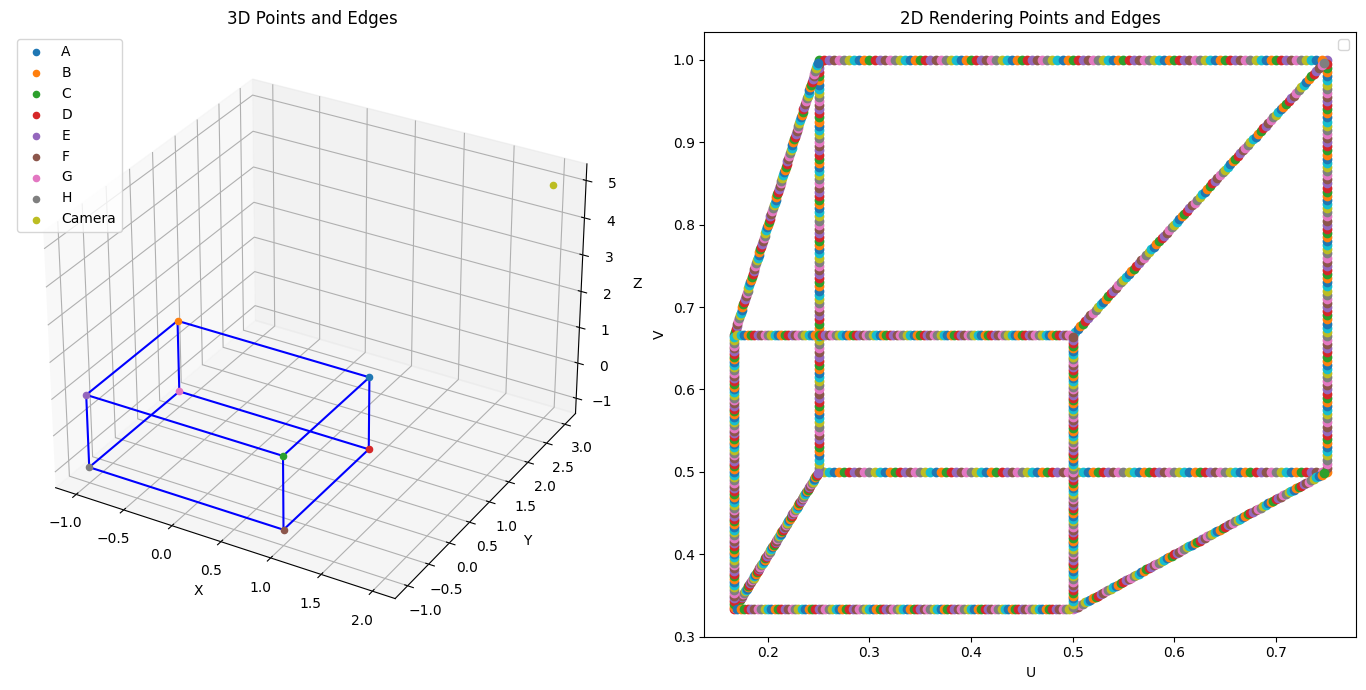

In [25]:
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('3D Points and Edges')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

points.update({'Camera': Camera})
for point, coordinate in points.items():
    ax1.scatter(*coordinate, label=point)

for edge in edges:
    p1, p2 = edge
    x1, y1, z1 = points[p1]
    x2, y2, z2 = points[p2]
    ax1.plot([x1, x2], [y1, y2], [z1, z2], 'b-')

ax1.legend()

ax2 = fig.add_subplot(122)
ax2.set_title('2D Rendering Points and Edges')
ax2.set_xlabel('U')
ax2.set_ylabel('V')

for coordinate in rasterization_points:
    ax2.scatter(*coordinate)

ax2.legend()

plt.tight_layout()
plt.show()